In [178]:
# importing needed lib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import r2_score



In [158]:
#reading the data from csv file into pandas dataframe
df = pd.read_csv("Salary_dataset.csv",index_col=[0])

In [159]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


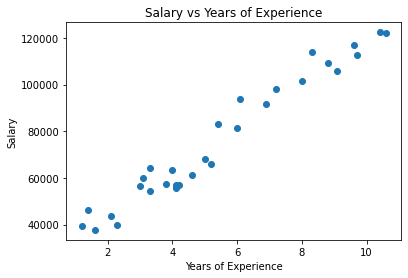

In [160]:
# plotting the dataset
plt.scatter(df["YearsExperience"], df["Salary"])

# adding title and axes labels
plt.title("Salary vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# displaying the plot
plt.show()



In [161]:
# x = feature 
# y = target value 
x = df["YearsExperience"]
y = df['Salary']



In [162]:
# length of the dataset
m = df.shape[0]


In [163]:
#split the dataset into train, test dataset
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
# Reset the indices of the data
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


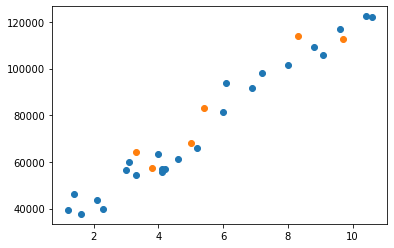

In [165]:
# plotting train dataset and y dataset to check if its randomly choosen and not baised 
plt.scatter(x_train, y_train) #blue
plt.scatter(x_test, y_test) #orange
plt.show()

In [166]:
def compute_cost(x, y, w, b):
    """
    Compute the cost function J for a linear regression model.

    Parameters:
    x (numpy array): input features
    y (numpy array): target values
    w (float): weight parameter of the model
    b (float): bias parameter of the model

    Returns:
    total_cost (float): the value of the cost function J

    """
    # Initialize cost and number of training examples
    cost = 0
    m = len(x)

    # Compute the sum of squared errors over all training examples
    for i in range(m):
        cost += ((w * x[i] + b) - y[i]) ** 2

    # Divide the total cost by twice the number of training examples
    # to obtain the final value of the cost function J
    total_cost = cost / (2 * m)

    return total_cost


In [167]:
def compute_gradient(x, y, w, b):
    """
    Compute the gradient of the cost function J with respect to
    the weight and bias parameters.

    Parameters:
    x (numpy array): input features
    y (numpy array): target values
    w (float): weight parameter of the model
    b (float): bias parameter of the model

    Returns:
    dw (float): the partial derivative of J with respect to w
    db (float): the partial derivative of J with respect to b

    """
    # Initialize gradients and number of training examples
    dw = 0
    db = 0 
    m = len(x)

    # Compute the gradients over all training examples
    for i in range(m):
        dw += ((w * x[i] + b) - y[i]) * x[i]
        db += ((w * x[i] + b) - y[i])

    # Divide the gradients by the number of training examples
    # to obtain the partial derivatives of J with respect to w and b
    dw = (1 / m) * dw
    db = (1 / m) * db

    return dw, db


In [168]:
def model(w,b,x_i):
    f_wb = w*x_i+b
    return f_wb


In [169]:
def fit_model(epochs, l):
    # Randomly initialize w and b
    w = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    
    # Train the model for the specified number of epochs
    for i in range(epochs):
        # Compute the cost and gradient using the current values of w and b
        cost = compute_cost(x, y, w, b)
        gradient = compute_gradient(x, y, w, b)
        dw = gradient[0]
        db = gradient[1]

        # Update the values of w and b using the learning rate
        w = w - l * dw
        b = b - l * db
        
        # Print the cost and updated values of w and b every 1000 epochs
        if i % 1000 == 0:
            print("Epoch:", i, "Cost:", cost, "w:", w, "b:", b)
    return w,b

In [170]:

epochs = 150000 #number of iterations
l = 0.0001 # learning rate

w,b = fit_model(epochs, l) # training the model

Epoch: 0 Cost: 3251750849.368371 w: 48.07546536565387 b: 7.7274758479974714
Epoch: 1000 Cost: 70375572.99770279 w: 12465.041149163264 b: 2307.331258129302
Epoch: 2000 Cost: 66630855.99448871 w: 12678.42392959345 b: 2806.1439537937986
Epoch: 3000 Cost: 64576627.090452395 w: 12618.927931259203 b: 3255.397905252812
Epoch: 4000 Cost: 62605894.02340337 w: 12554.608075343393 b: 3694.6281780902796
Epoch: 5000 Cost: 60714517.63595056 w: 12491.460937311673 b: 4124.904358845021
Epoch: 6000 Cost: 58899302.04901665 w: 12429.59520129227 b: 4546.428031026186
Epoch: 7000 Cost: 57157180.465356275 w: 12368.987780958449 b: 4959.377662709439
Epoch: 8000 Cost: 55485209.57985829 w: 12309.613148373906 b: 5363.9276645604605
Epoch: 9000 Cost: 53880564.606641516 w: 12251.44622944058 b: 5760.2488900324
Epoch: 10000 Cost: 52340534.506594226 w: 12194.462458611993 b: 6148.508717106604
Epoch: 11000 Cost: 50862517.407087535 w: 12138.637769985724 b: 6528.871119196534
Epoch: 12000 Cost: 49444016.206125885 w: 12083.948

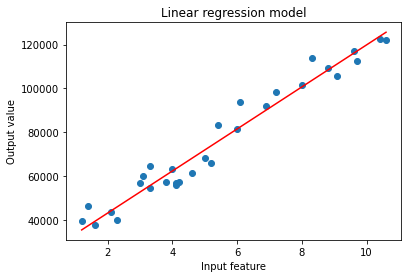

In [171]:
plt.scatter(x, y)

# Compute the predicted values for the regression line
y_pred = w * x + b

# Plot the regression line
plt.plot(x, y_pred, color='red')

# Add labels and a title to the plot
plt.xlabel('Input feature')
plt.ylabel('Output value')
plt.title('Linear regression model')

# Show the plot
plt.show()


In [172]:
def calculate_mse(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) between the true and predicted values.

    Args:
    y_true: array-like, true values
    y_pred: array-like, predicted values

    Returns:
    mse: float, the Mean Squared Error (MSE)
    """
    n = len(y_true)
    mse = sum([(y_true[i] - y_pred[i]) ** 2 for i in range(n)]) / n
    return mse


In [173]:
mse = calculate_mse(y, y_pred) #mean squred error 
mse

In [181]:
r2_score(y, y_pred) # model accuracy

0.9566363651006894